In [62]:
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
netflix = pd.read_csv("netflix_titles.csv")

**1º Passo: Limpeza de Dados**

* Analisar o dataset
* Limpar e analisar as colunas
* Remover colunas duplicadas 

In [63]:
# Analisando o número de linhas e colunas
netflix.shape
# Verificando os nomes das colunas
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Verificando os valores nulos**

In [66]:
# Analisando a quantidade de valores nulos presentes em nosso dataframe
netflix.isna().sum().sort_values()

show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
rating            10
date_added        11
country          476
cast             570
director        1969
dtype: int64

**Verificando os valores únicos**

In [67]:
# O metodo nunique retornar os valores únicos presentes em uma coluna
netflix.nunique().sort_values()

type               2
rating            14
release_year      72
duration         201
listed_in        461
country          554
date_added      1524
director        3301
cast            5469
title           6172
description     6226
show_id         6234
dtype: int64

**Analisando os valores duplicados presentes nas colunas**

In [68]:
# Utilizando o metodo duplicated para analisar a quantidade de valores duplicados presentes em nossas colunas
netflix.duplicated().sum()

0

**Fazendo uma cópia do nosso dataframe, isso é importante para não afetarmos o dataframe original ao realizarmos a análise**

In [71]:
netflix_dados = netflix.copy()
netflix_dados.shape

(6234, 12)

**Limpando os valores nulos, verificamos anteriormente e agora iremos eliminá-los**

In [76]:
# Limpando os valores nulos
netflix_dados = netflix_dados.dropna()
# Conferindo a quantidade de valores nulos após a limpeza, tem que ser 0
netflix_dados.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [77]:
# Podemos verificar que reduziu bastante com o shape
netflix_dados.shape

(3774, 12)

**Convertendo para o formato padrão de data e hora**

In [81]:
# Modifiquei a coluna date_added para o formato data e hora
netflix_dados["date_added"] = pd.to_datetime(netflix_dados['date_added'])
netflix_dados['day_added'] = netflix_dados['date_added'].dt.day
netflix_dados['year_added'] = netflix_dados['date_added'].dt.year
netflix_dados['month_added'] = netflix_dados['date_added'].dt.month
netflix_dados['year_added'].astype(int)
netflix_dados['day_added'].astype(int)
netflix_dados.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,2017,9
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",8,2017,9
19,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium",2017-09-08,2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...,8,2017,9
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,2017-09-08,2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,8,2017,9
21,80046728,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium",2017-09-08,2015,R,96 min,"Action & Adventure, Comedies, International Mo...","A brain-addled war vet, a failing band manager...",8,2017,9
23,70304988,Movie,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,2017-09-08,2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f...",8,2017,9


**Vamos começar a parte da visualização dos dados, utilizando o Seaborn**
* 1º Análise: Relação entre os filmes e as séries, qual conteúdo é o mais produzido ?

**Relação entre filmes e séries**
   
Para realizar esse gráfico é interessante utilizar o **countplot**, para compararmos visuamente os dados.

O countplot cria gráficos de barras de acordo com o **número de observações** presentes em uma categoria, ou coluna do nosso dataframe. Assim podemos comparar diretamente quais tem a **maior frequência** entre elas.



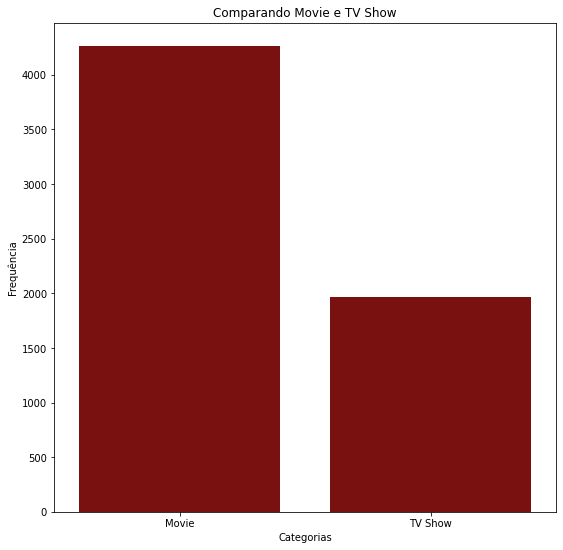

In [87]:
# Utilizando a biblioteca seaborn para criar o gráfico countplot
sns.countplot(x=netflix["type"], color="darkred")
fig = plt.gcf()
fig.set_size_inches(9,9)
# Editando os eixos x e y
plt.xlabel("Categorias")
plt.ylabel("Frequência")
# Editando o titulo
plt.title('Comparando Movie e TV Show')
plt.savefig("1º Grafico.pdf")

**Fazendo o mesmo gráfico, porém de um jeito mais simples**

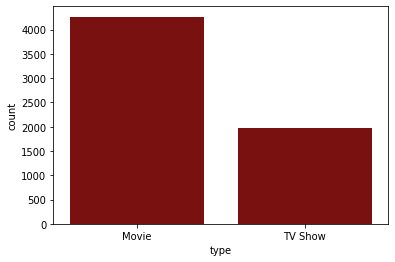

In [84]:
#  Estou pegando a coluna type, onde temos movie e séries e carregando nosso dataframe
sns.countplot(x="type", data = data, color='darkred')
plt.show()

**Vamos fazer um gráfico relacionando as proporções de produçao de Filmes(Movie) e TV-Show(Series)**

In [61]:
# Criando um dataframe para verificarmos a quantidade de filmes e series criadas em relação ao ano

# Realiza um agrupamento por ano e tipo, e em seguida, conta a quantidade de ocorrências de 'show_id' em cada grupo.
# unstack(fill_value=0): Transforma o resultado do agrupamento em um formato tabular, onde os anos se tornam índices de linha, os tipos se tornam colunas e os valores são preenchidos com contagens. 
# O parâmetro fill_value=0 preenche eventuais valores ausentes com zeros.
conteudo_distribuiçao = netflix_dados.groupby(["year_added", "type"])["show_id"].count().unstack(fill_value=0)
conteudo_distribuiçao

type,Movie,TV Show
year_added,,
2008,1,0
2009,2,0
2010,1,0
2011,13,0
2012,4,0
2013,6,1
2014,14,0
2015,47,3
2016,204,7


In [50]:

# Este comando adiciona uma nova coluna chamada 'Total' 
# ao DataFrame content_distribution. 
# O valor de cada célula na coluna 'Total' é a soma dos valores das colunas existentes em cada linha.
conteudo_distribuiçao['Total'] = conteudo_distribuiçao.sum(axis=1)
conteudo_distribuiçao

type,Movie,TV Show,Total,TV Show Proportion,Movie Proportion
year_added,,,,,
2008,1,0,18.001712,0.000000,0.109589
2009,2,0,35.007759,0.000000,0.110345
2010,1,0,18.001712,0.000000,0.109589
2011,13,0,222.012940,0.000000,0.110993
2012,4,0,69.010813,0.000000,0.110727
2013,6,1,120.012129,0.015842,0.095050
2014,14,0,239.013008,0.000000,0.111001
2015,47,3,851.013642,0.006665,0.104415
2016,204,7,3588.013830,0.003686,0.107418


**Aqui vamos criar nosso gráfico relacionando os filmes e series produzidos ao longos dos anos**

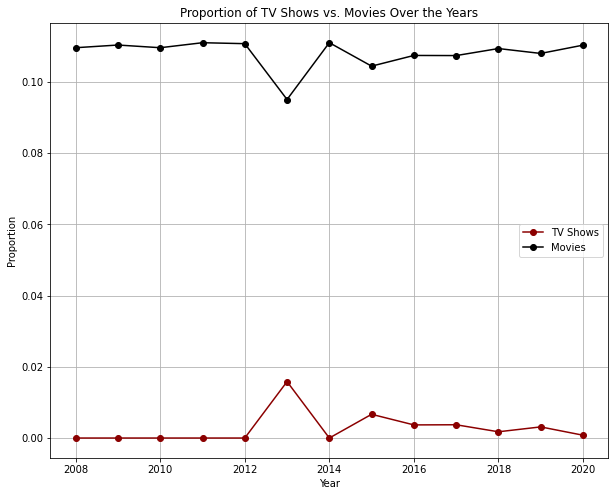

In [41]:
# calculando a porcentagem
conteudo_distribuiçao['TV Show Proportion'] = conteudo_distribuiçao['TV Show'] / conteudo_distribuiçao['Total']
conteudo_distribuiçao['Movie Proportion'] = conteudo_distribuiçao['Movie'] / conteudo_distribuiçao['Total']


plt.figure(figsize=(10, 8))
plt.plot(conteudo_distribuiçao.index, conteudo_distribuiçao['TV Show Proportion'], label='TV Shows', marker='o')
plt.plot(conteudo_distribuiçao.index, conteudo_distribuiçao['Movie Proportion'], label='Movies', marker='o')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.title('Proportion of TV Shows vs. Movies Over the Years')
plt.grid(True)
plt.show()

**Filmes e series produzidas a partir dos anos 2000**

In [57]:
import plotly.express as px 
producao = netflix_dados[["release_year", "type"]]

producao = producao[producao['release_year']>=2000]
producao = producao.groupby(['release_year', 'type']).size().reset_index(name='Total Count')
producao

,release_year,type,Total Count
0,2000,Movie,28
1,2001,Movie,29
2,2001,TV Show,1
3,2002,Movie,35
4,2003,Movie,34
5,2004,Movie,40
6,2005,Movie,49
7,2006,Movie,58
8,2006,TV Show,2
9,2007,Movie,56


In [58]:
graph = px.line(producao, x = "release_year", y="Total Count", color = "type", color_discrete_sequence=["darkred", "black"], title = ("Tendência dos conteúdos produzidos em cada ano a partir de 2000"))
graph.show()

**2º Análise: Faixa etária com mais conteúdo**

Sobre os ratings (classificações indicativas) dos conteúdos mais produzidos na Netflix em 2019, os três primeiros lugares são:

* 1º lugar: TV-MA
* 2º lugar: TV-14
* 3º lugar: R

Essas classificações indicativas são usadas para orientar o público sobre o conteúdo e sua adequação para diferentes faixas etárias. O "TV-MA" (Mature Audience) é indicado para maiores de 17 anos, "TV-14" é adequado para maiores de 14 anos e "R" geralmente requer que menores de 17 anos estejam acompanhados por um adulto

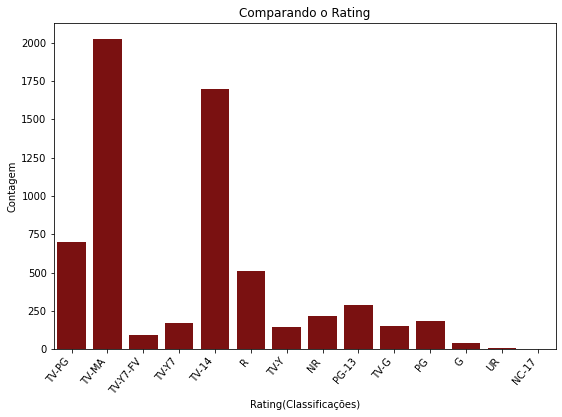

In [91]:

rating_graph = sns.countplot(x=netflix['rating']).set_xticklabels(sns.countplot(x=netflix['rating'], color="darkred").get_xticklabels(), rotation=50, ha="right")
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.xlabel("Rating(Classificações)")
plt.ylabel("Contagem")
plt.title('Comparando o Rating')
plt.savefig("2º Grafico.pdf")

Utilizando o countplot do Seaborn para comparar as categorias de, filmes e séries, em relação ao rating.

Podemos ver que todas tem **mais produção de filmes que séries**

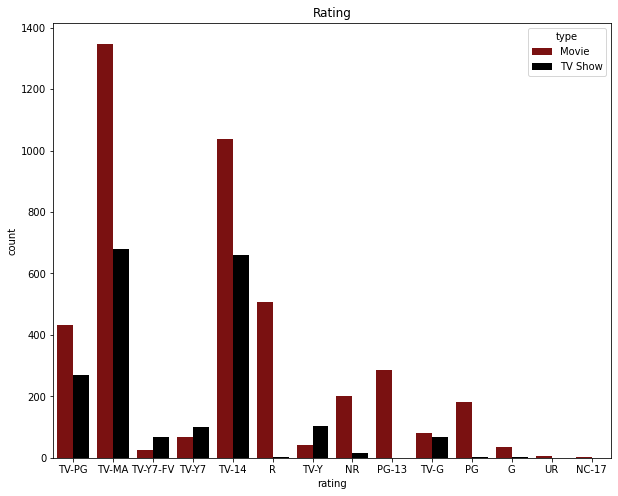

In [94]:
plt.figure(figsize=(10,8))
# use a handmade palette
cor = ["darkred", "black"]
sns.set_palette(cor)
sns.countplot(x='rating',hue="type", data=netflix)
plt.title('Rating')
plt.savefig("4º grafico.pdf")

**Agora vamos conhecer quais generos foram mais produzidos pela Netflix em 2019**

Podemos ver que os 3 principais são:

* 1º Dramas e International Movies
* 2º Stand- Up comedy
* 3º Dramas, Independent Moveis

<AxesSubplot: >

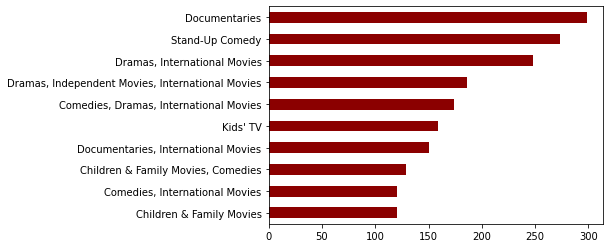

In [95]:
# Podemos fazer de forma simplificada e direta
netflix["listed_in"].value_counts().head(10).sort_values().plot(kind="barh")

**2º Metodo utilizando plotly para criar um gráfico de pizza**

In [96]:
# criando a variável generos para armezenar os generos mais frequentes
generos = netflix.groupby(["listed_in"]).size().reset_index(name="counts").sort_values(by="counts", ascending=False).head(10)
print(generos)

                                            listed_in  counts
248                                     Documentaries     299
420                                   Stand-Up Comedy     273
293                      Dramas, International Movies     248
286  Dramas, Independent Movies, International Movies     186
179            Comedies, Dramas, International Movies     174
381                                          Kids' TV     159
254               Documentaries, International Movies     150
110                Children & Family Movies, Comedies     129
107                          Children & Family Movies     120
196                    Comedies, International Movies     120


In [97]:
# Criando o gráfico de pizza com as porcentagens
pieChart = px.pie(generos, values='counts', names='listed_in',color_discrete_sequence=px.colors.sequential.RdBu, title='Top 10 generos Netflix')
pieChart.show()

In [21]:
director = pd.DataFrame(netflix_dados["director"])
director

,director
0,"Richard Finn, Tim Maltby"
4,Fernando Lebrija
6,Gabe Ibáñez
7,"Rodrigo Toro, Francisco Schultz"
9,Henrik Ruben Genz
...,...
6142,Andy Devonshire
6158,Thomas Astruc
6167,"Vikramaditya Motwane, Anurag Kashyap"
6182,Jung-ah Im


In [22]:
director_and_listed_in = netflix_dados[["director", "listed_in"]]
director_and_listed_in

,director,listed_in
0,"Richard Finn, Tim Maltby","Children & Family Movies, Comedies"
4,Fernando Lebrija,Comedies
6,Gabe Ibáñez,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,"Rodrigo Toro, Francisco Schultz",Stand-Up Comedy
9,Henrik Ruben Genz,"Action & Adventure, Thrillers"
...,...,...
6142,Andy Devonshire,"British TV Shows, Reality TV"
6158,Thomas Astruc,"Kids' TV, TV Action & Adventure"
6167,"Vikramaditya Motwane, Anurag Kashyap","Crime TV Shows, International TV Shows, TV Dramas"
6182,Jung-ah Im,"International TV Shows, Korean TV Shows, Stand..."


**3º Análise: Faixa etária com mais conteúdo**

Vamos criar um nuvem de palavra com a biblioteca **WorldCloud** sobre a coluna **Country** do nosso dataframe.
Assim podemos identificar os países onde que possuem a maior quantidade de produção de filmes e séries.

<AxesSubplot: >

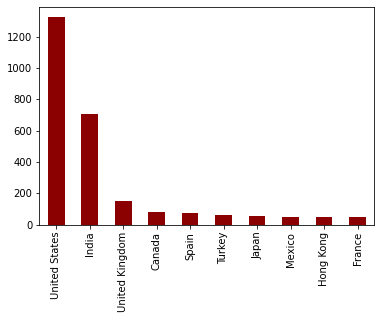

In [23]:
# Verificando os top 10 paises em produção
netflix_dados["country"].value_counts().head(10).plot(kind="bar")

**Criando a nuvem de palavras**

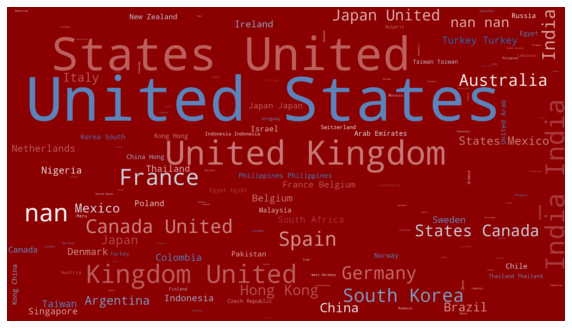

In [24]:
from wordcloud import WordCloud
text = " ".join(data["country"].astype(str))

# Gerar a nuvem de palavras
wordcloud = WordCloud(background_color='darkred',
                      width=1920,
                      height=1080,
                      colormap="vlag_r"
                      ).generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('country.png')
plt.show()